In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cell_list = ['B_Naive','CD4_memory','CD8_memory']

confusion_matrix
 [[53  3]
 [ 9 23]]
accuracy:0.8636363636363636
precision:0.8846153846153846
recall:0.71875
f1-score:0.7931034482758621


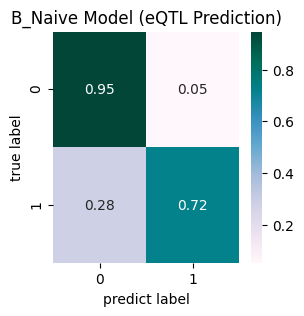

In [3]:
cell = cell_list[0]

# load datasets
y_true = np.load('../../model/pred_results_eqtl/' + cell + 'small_label.npy')
y_pred = np.load('../../model/pred_results_eqtl/' + cell + 'small_predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
sns.heatmap(new_obj, fmt='.2f', cmap='PuBuGn', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.title(cell + ' Model (eQTL Prediction)')
plt.savefig('images/cm-small' + cell + '.png',dpi=300, bbox_inches = 'tight')
plt.show()

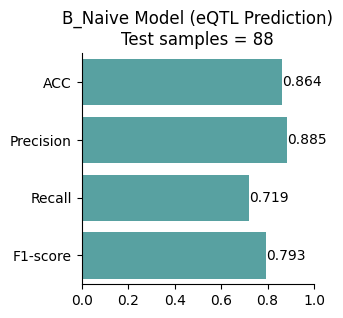

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

samples = y_pred.shape[0]
fig = plt.figure(figsize=(3,3))
ax = sns.barplot(y=[0,1,2,3], x=[0.864,0.885,0.719,0.793],color='#008B8B',orient="h",alpha=0.7)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_yticklabels(labels = ["ACC", "Precision", "Recall",  "F1-score"],fontsize = 10) 
plt.xlim((0, 1))

sns.despine()
plt.title(cell + ' Model (eQTL Prediction)\nTest samples = ' + str(samples))
plt.savefig('images/' + cell + 'bar-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.8787448347107437


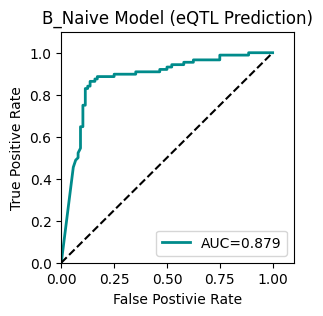

In [5]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)
ax = plt.subplots(figsize=(3,3))
plt.title(cell + ' Model (eQTL Prediction)')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb,color='#008B8B')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/' + cell + 'auc-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

confusion_matrix
 [[37  5]
 [15 46]]
accuracy:0.8058252427184466
precision:0.9019607843137255
recall:0.7540983606557377
f1-score:0.8214285714285715


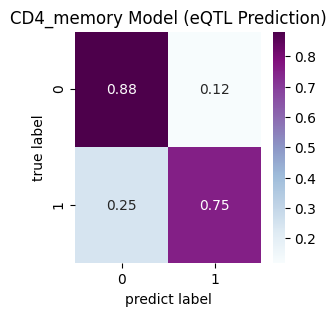

In [6]:
cell = cell_list[1]

# load datasets
y_true = np.load('../../model/pred_results_eqtl/' + cell + 'small_label.npy')
y_pred = np.load('../../model/pred_results_eqtl/' + cell + 'small_predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
sns.heatmap(new_obj, fmt='.2f', cmap='BuPu', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.title(cell + ' Model (eQTL Prediction)')
plt.savefig('images/cm-small' + cell + '.png',dpi=300, bbox_inches = 'tight')
plt.show()

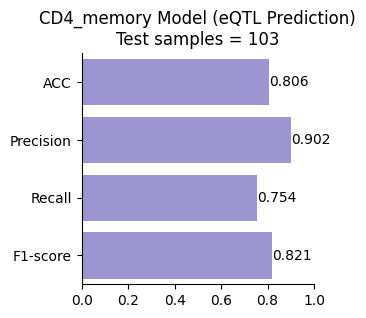

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

samples = y_pred.shape[0]
fig = plt.figure(figsize=(3,3))
ax = sns.barplot(y=[0,1,2,3], x=[0.806,0.902,0.754,0.821],color='#6A5ACD',orient="h",alpha=0.7)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_yticklabels(labels = ["ACC", "Precision", "Recall",  "F1-score"],fontsize = 10) 
plt.xlim((0, 1))

sns.despine()
plt.title(cell + ' Model (eQTL Prediction)\nTest samples = ' + str(samples))
plt.savefig('images/' + cell + 'bar-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.8719483457441795


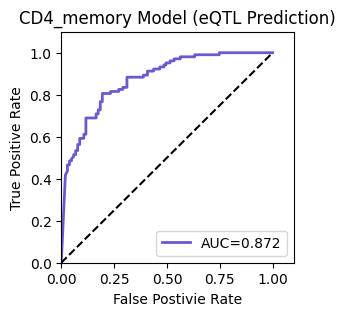

In [8]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)
ax = plt.subplots(figsize=(3,3))
plt.title(cell + ' Model (eQTL Prediction)')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb,color='#6A5ACD')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/' + cell + 'auc-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

confusion_matrix
 [[61 11]
 [13 44]]
accuracy:0.813953488372093
precision:0.8
recall:0.7719298245614035
f1-score:0.7857142857142858


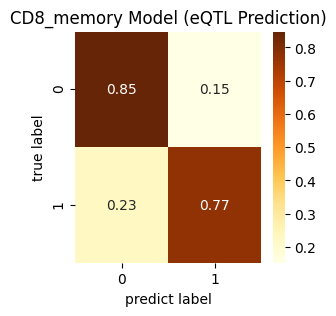

In [9]:
cell = cell_list[2]

# load datasets
y_true = np.load('../../model/pred_results_eqtl/' + cell + 'small_label.npy')
y_pred = np.load('../../model/pred_results_eqtl/' + cell + 'small_predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
sns.heatmap(new_obj, fmt='.2f', cmap='YlOrBr', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.title(cell + ' Model (eQTL Prediction)')
plt.savefig('images/cm-small' + cell + '.png',dpi=300, bbox_inches = 'tight')
plt.show()

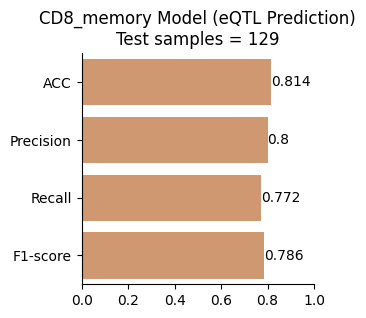

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

samples = y_pred.shape[0]
fig = plt.figure(figsize=(3,3))
ax = sns.barplot(y=[0,1,2,3], x=[0.814,0.800,0.772,0.786],color='#D2691E',orient="h",alpha=0.7)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_yticklabels(labels = ["ACC", "Precision", "Recall",  "F1-score"],fontsize = 10) 
plt.xlim((0, 1))

sns.despine()
plt.title(cell + ' Model (eQTL Prediction)\nTest samples = ' + str(samples))
plt.savefig('images/' + cell + 'bar-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.8842617631151974


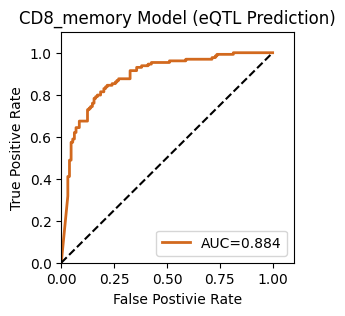

In [11]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)
ax = plt.subplots(figsize=(3,3))
plt.title(cell + ' Model (eQTL Prediction)')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb,color='#D2691E')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/' + cell + 'auc-small.png',dpi=300, bbox_inches = 'tight')
plt.show()